1:
    
A Classification Decision Tree is a type of machine learning model used for solving classification problems. These problems involve categorizing data points into predefined classes or categories based on input features. This might be useful for medical diagnosis, fraud detection, customer segmentation, loan approval, and spam detection. The difference between the two is that a classification decision tree makes categorical predictions, while multiple linear regression makes continuous predictions. Futhermore, their model stuctures are different, as their names suggests, one uses a tree-like model and the other uses linear line equations. Moreover, Classification Decision Tree handles non-linear relationships and multiple linear regression assumes linear relationship. 


2:

a. Accuracy is used when the dataset is balanced, so there are around the same number of positive and negative cases. For example, classifying spam emails in an inbox when the number of spam and non-spam emails is roughly equal. Accuracy can offer an overall idea of the data and model, but does not work well when dealing with imbalanced datasets. 

b. Sensitivity is used in high-risk scenarios like medical diagnosis of a severe and serious disease. Sensitivity is used when failing to detect a positive case (false negative) is much worse than a false positive. Sensitivity ensures the model identifies as many true positives as possible, minimizing the chances of missing critical cases.

c. Specificity is used when false positives are costly or distruptive, meaning they can affect the result of the prediction when not accounted for correctly. An example would be screening for rare conditions where treatment or follow-up for a false positive is invasive, expensive, or emotionally taxing (e.g., rare genetic disorders). Specificity can ensure the model minimilizes false alarms and deals with false positives which is important when the cost of making mistakes are high. 

d. Precision is used to ensure high accuracy on the positive predictions and reduces false positives. For example, email spam detection, where marking legitimate emails as spam (false positives) can frustrate users.  Precision ensures that when the model predicts a positive, it is likely to be correct, which is vital in scenarios where false positives are unacceptable.

3: 
    

In [4]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above


In [5]:
# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Step 1: Remove specified columns
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"])

# Step 2: Drop all rows with NaN entries
ab_reduced_noNaN = ab_reduced.dropna()

# Step 3: Convert specified columns to the desired data types
ab_reduced_noNaN["Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN["NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN["Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

# Verify preprocessing
print(ab_reduced_noNaN.info())
print(ab_reduced_noNaN.head())


<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Title          319 non-null    object  
 1   Author         319 non-null    object  
 2   List Price     319 non-null    float64 
 3   Amazon Price   319 non-null    float64 
 4   Hard_or_Paper  319 non-null    category
 5   NumPages       319 non-null    int64   
 6   Publisher      319 non-null    object  
 7   Pub year       319 non-null    int64   
 8   ISBN-10        319 non-null    object  
 9   Thick          319 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 25.4+ KB
None
                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)        

/tmp/ipykernel_53/751818589.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN["Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
/tmp/ipykernel_53/751818589.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN["NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
/tmp/ipykernel_53/751818589.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [6]:
# Summarize numerical columns
print(ab_reduced_noNaN.describe())

# Summarize categorical columns
print(ab_reduced_noNaN.describe(include=["category"]))

# Check for unique values in 'Hard_or_Paper'
print(ab_reduced_noNaN["Hard_or_Paper"].value_counts())


       List Price  Amazon Price    NumPages     Pub year       Thick
count  319.000000    319.000000  319.000000   319.000000  319.000000
mean    18.362978     12.941034  334.272727  2002.175549    0.903448
std     13.976755     12.436673  161.601510    10.646133    0.365261
min      1.500000      0.770000   24.000000  1936.000000    0.100000
25%     13.890000      8.600000  208.000000  1998.000000    0.600000
50%     15.000000     10.200000  320.000000  2005.000000    0.900000
75%     19.360000     12.560000  416.000000  2010.000000    1.100000
max    139.950000    139.950000  896.000000  2011.000000    2.100000
       Hard_or_Paper
count            319
unique             2
top                P
freq             233
Hard_or_Paper
P    233
H     86
Name: count, dtype: int64


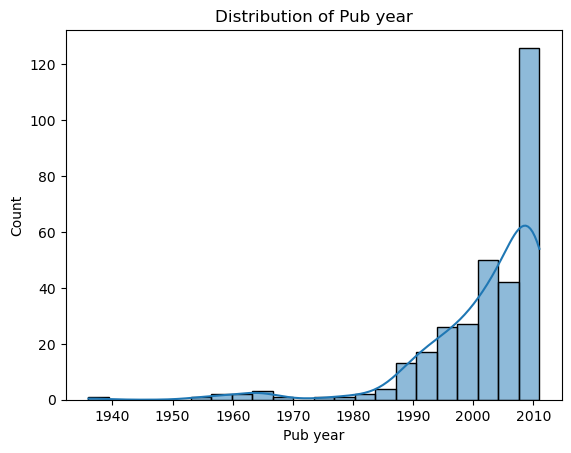

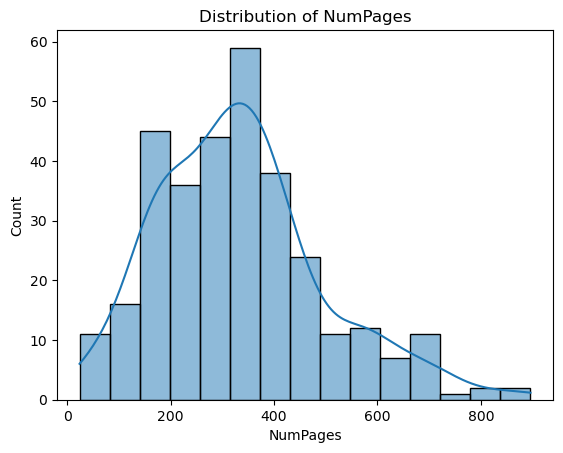

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions of numerical columns
numerical_columns = ["Pub year", "NumPages"]
for col in numerical_columns:
    sns.histplot(ab_reduced_noNaN[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


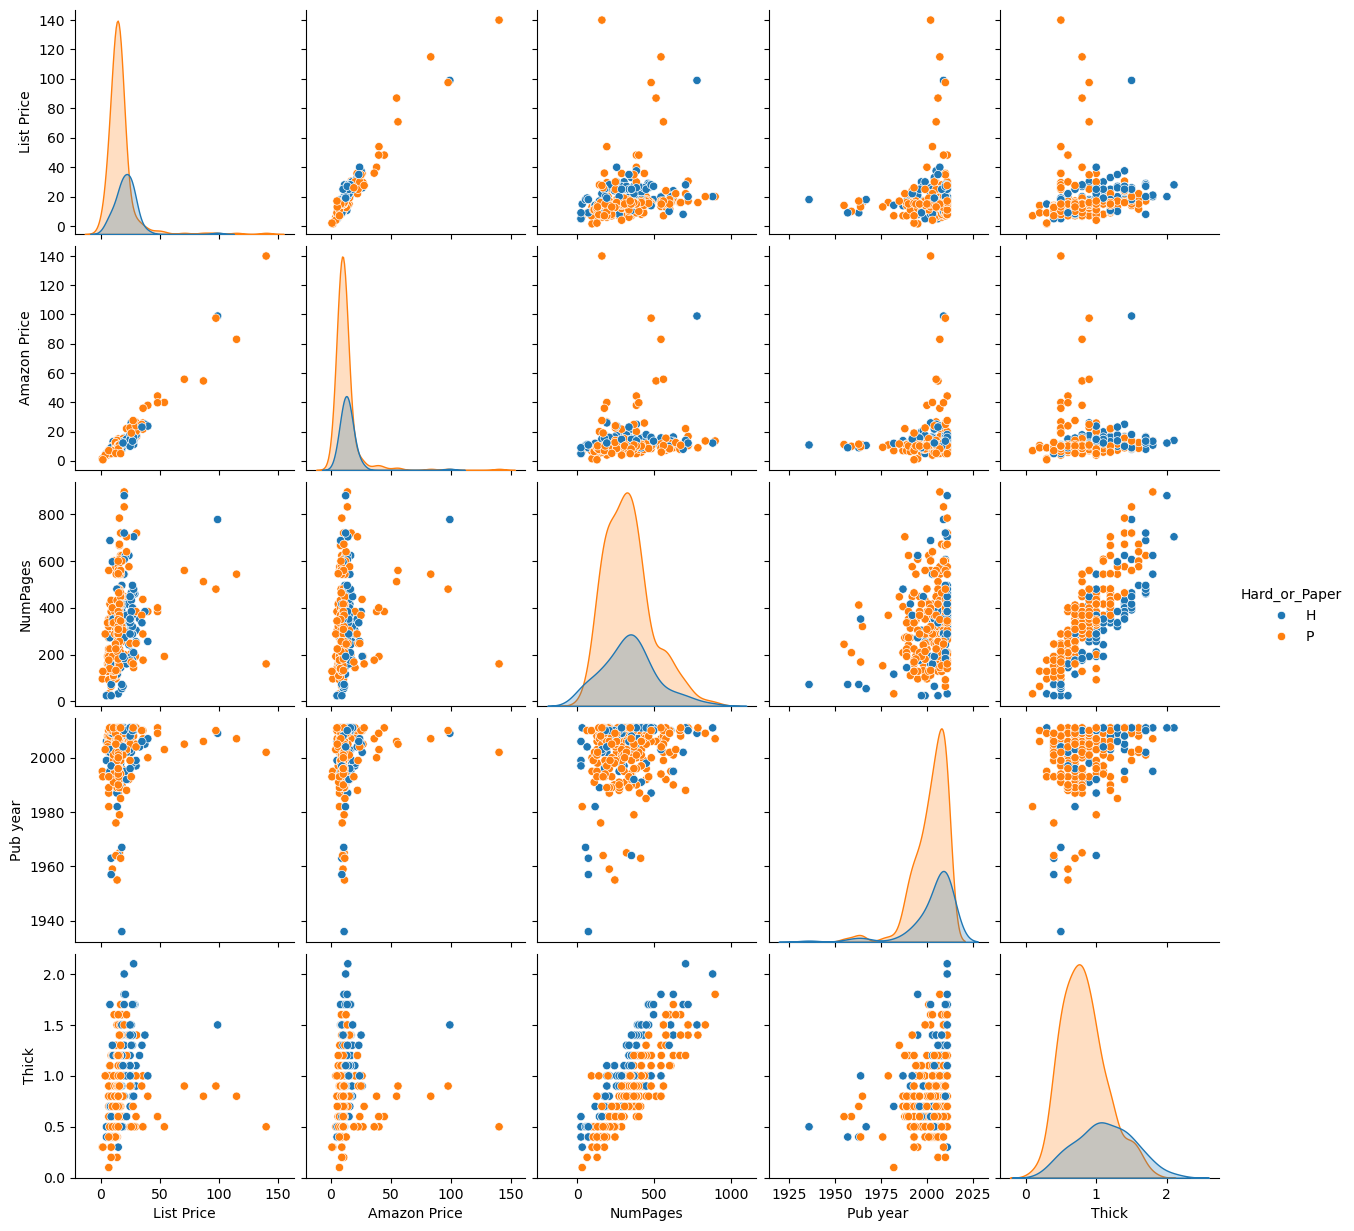

In [10]:
# Pairplot to analyze relationships between numerical features
sns.pairplot(ab_reduced_noNaN, hue="Hard_or_Paper")
plt.show()

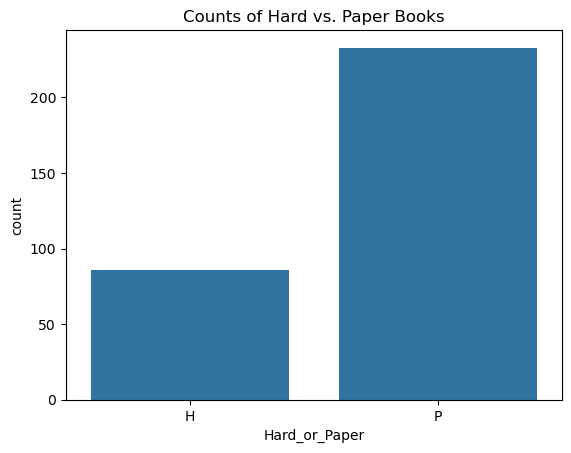

In [11]:
# Assuming 'Hard_or_Paper' is of interest
sns.countplot(data=ab_reduced_noNaN, x="Hard_or_Paper")
plt.title("Counts of Hard vs. Paper Books")
plt.show()

4:

In [15]:
random_seed = 42

ab_reduced_noNaN_train = ab_reduced_noNaN.sample(frac=0.8, random_state=random_seed)

ab_reduced_noNaN_test = ab_reduced_noNaN.drop(ab_reduced_noNaN_train.index)

print(f"Training set size: {len(ab_reduced_noNaN_train)}")
print(f"Testing set size: {len(ab_reduced_noNaN_test)}")


Training set size: 255
Testing set size: 64


In [16]:
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

this code converts the target variable Hard_or_Paper (which is categorical) into a binary numerical format suitable for classification. y becomes the target variable, where:
y = 1 if the book is Hardcover.
y = 0 if the book is Paperback

In [17]:
X = ab_reduced_noNaN[['List Price']]

this code chooses the feature(s) to be used for prediction. X is a DataFrame containing only the List Price feature, which will be used as the predictor

In [19]:
from sklearn.tree import DecisionTreeClassifier

# Define the feature matrix (X) and target vector (y)
X = ab_reduced_noNaN[['List Price']]  # Predictor: List Price
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target: 1 if Hardcover, 0 if Paperback

# Initialize the DecisionTreeClassifier with a max_depth of 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train (fit) the classifier on the data
clf.fit(X, y)

# Output the trained model
print("Decision Tree Classifier trained successfully.")


Decision Tree Classifier trained successfully.


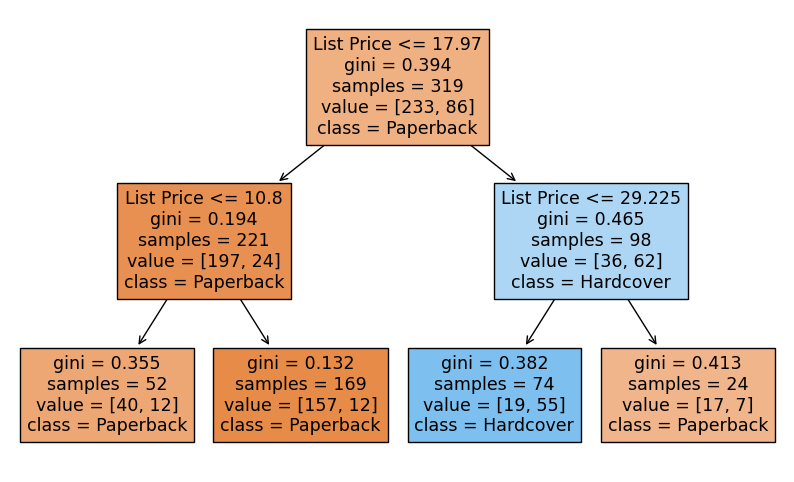

In [20]:
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=["List Price"], class_names=["Paperback", "Hardcover"], filled=True)
plt.show()


In [21]:
from sklearn.metrics import accuracy_score

# Predict on training data
y_pred_train = clf.predict(X)

# Calculate training accuracy
accuracy_train = accuracy_score(y, y_pred_train)
print(f"Training Accuracy: {accuracy_train:.2f}")


Training Accuracy: 0.84


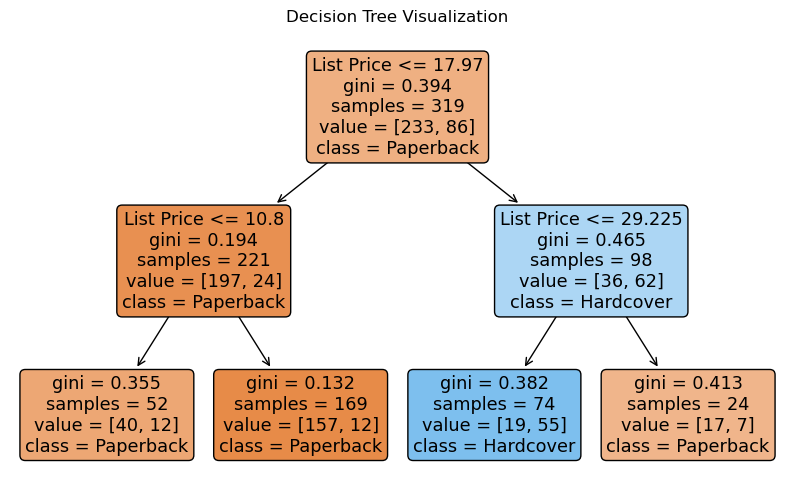

In [24]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(10, 6))
plot_tree(
    clf,
    feature_names=["List Price"],  # Feature name used for splits
    class_names=["Paperback", "Hardcover"],  # Class labels
    filled=True,  # Color nodes based on class
    rounded=True  # Round the edges for better readability
)
plt.title("Decision Tree Visualization")
plt.show()


The predictions are either hardcover or paperback based on the prices. If List Price ≤ 15.00:
Check if List Price ≤ 10.00:
If yes, predict Paperback.
If no, predict Hardcover.
If List Price > 15.00, predict Hardcover.

5:



In [25]:
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]

This is the feature matrix (independent variables) that you'll use to train your model. It contains only the selected columns from ab_reduced_noNaN.

max_depth set to 4

Controls the maximum depth of the tree. In this case, the maximum depth is set to 4, meaning:
The tree can have at most 4 levels.
This restriction helps prevent overfitting by limiting the tree's complexity.
A depth of 4 means the tree can make splits up to 4 levels deep

In [29]:
from sklearn.tree import DecisionTreeClassifier

# Define the model with a max_depth of 4
clf = DecisionTreeClassifier(max_depth=4)

# Fit the model to your data (example assumes you have X and y defined)
clf.fit(X, y)


DecisionTreeClassifier(max_depth=4)

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = ab_reduced_noNaN[['List Price']]  # Corrected to match your DataFrame
y = ab_reduced_noNaN['Hard_or_Paper']   # Corrected to match your DataFrame

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree classifier
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")



Model Accuracy: 0.86


In [31]:
print(ab_reduced_noNaN.columns)


Index(['Title', 'Author', 'List Price', 'Amazon Price', 'Hard_or_Paper',
       'NumPages', 'Publisher', 'Pub year', 'ISBN-10', 'Thick'],
      dtype='object')


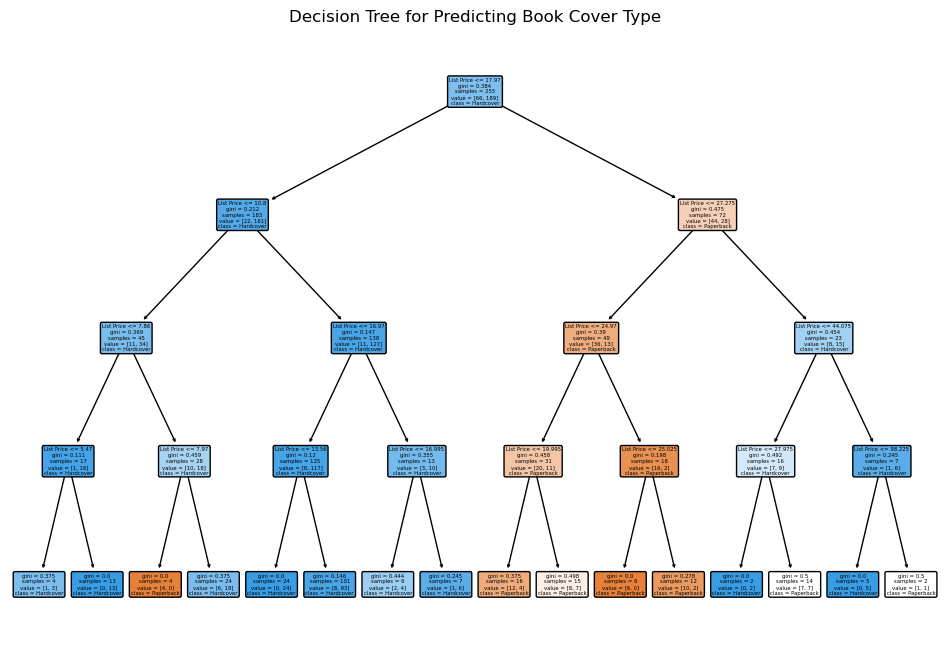

In [35]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
plot_tree(clf, 
          feature_names=['List Price'],  # Name of the feature(s)
          class_names=['Paperback', 'Hardcover'],  # Target class labels
          filled=True,  # Fill nodes with colors based on predictions
          rounded=True)  # Rounded corners for better visualization
plt.title("Decision Tree for Predicting Book Cover Type")
plt.show()


Predictions are made for clf2 models with the following steps:
    
1. start at the root node of the tree, which has a splitting rule based on a feature. In this case, it's the list price.

2. split into decision nodes, At each decision node, a condition is evaluated based on the feature value. The model determines whether to follow the left branch (true condition) or the right branch (false condition).

3. Eventually, the process reaches a leaf node, which contains: The predicted class (e.g., Paperback or Hardcover) for samples in that group. The distribution of samples in that group (e.g., 70% Paperback, 30% Hardcover). The leaf prediction is usually the majority class within that node.

6: 

In [57]:
print(ab_reduced_noNaN_test.columns)

Index(['Title', 'Author', 'List Price', 'Amazon Price', 'Hard_or_Paper',
       'NumPages', 'Publisher', 'Pub year', 'ISBN-10', 'Thick'],
      dtype='object')


In [68]:
print(hasattr(clf2, 'tree_'))  # Should print True if the model is fitted


False


In [70]:
# Ensure you have the right training data (features and target) for clf2
X_train_clf2 = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]  # Features for clf2
y_train = ab_reduced_noNaN['Hard_or_Paper']  # The target variable for training

# Initialize the model (if not already done)
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier(max_depth=4)

# Train the clf2 model
clf2.fit(X_train_clf2, y_train)

# After fitting, you can now predict using the trained clf2 model on the test data
X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]  # Test data for clf2
y_pred_clf2 = clf2.predict(X_test_clf2)

# Now you can proceed with evaluating the model, creating confusion matrices, etc.


In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

X_test = ab_reduced_noNaN_test[['List Price']]  
y_test = ab_reduced_noNaN_test['Hard_or_Paper']    

y_pred_clf = clf.predict(X_test)

X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]  
y_pred_clf2 = clf2.predict(X_test_clf2)  

def compute_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])  
    tn, fp, fn, tp = cm.ravel()  

    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0  
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  
    accuracy = accuracy_score(y_true, y_pred)  

    return cm, sensitivity, specificity, accuracy

cm_clf, sensitivity_clf, specificity_clf, accuracy_clf = compute_metrics(y_test, y_pred_clf)

cm_clf2, sensitivity_clf2, specificity_clf2, accuracy_clf2 = compute_metrics(y_test, y_pred_clf2)

print("Metrics for clf (using List Price):")
print(f"Confusion Matrix:\n{cm_clf}")
print(f"Sensitivity: {sensitivity_clf:.2f}, Specificity: {specificity_clf:.2f}, Accuracy: {accuracy_clf:.2f}")

print("\nMetrics for clf2 (using NumPages, Thick, List Price):")
print(f"Confusion Matrix:\n{cm_clf2}")
print(f"Sensitivity: {sensitivity_clf2:.2f}, Specificity: {specificity_clf2:.2f}, Accuracy: {accuracy_clf2:.2f}")

TypeError: '<' not supported between instances of 'int' and 'str'

In [86]:
import numpy as np
import pandas as pd

# Ensure no NaN values are present in y_test_numeric_clean before type conversion
y_test_numeric_clean = y_test_numeric_clean.dropna()  # Remove NaN values

# Convert predictions to numeric (if they are not already), ignoring errors if they can't be converted
y_pred_clf = pd.to_numeric(y_pred_clf, errors='coerce')  # Coerce non-numeric values to NaN
y_pred_clf2 = pd.to_numeric(y_pred_clf2, errors='coerce')  # Coerce non-numeric values to NaN

# Remove NaN values from predictions using numpy's isnan() function
y_pred_clf = y_pred_clf[~np.isnan(y_pred_clf)]
y_pred_clf2 = y_pred_clf2[~np.isnan(y_pred_clf2)]

# Convert to int (after ensuring no NaN values)
y_test_numeric_clean = y_test_numeric_clean.astype(int)
y_pred_clf = y_pred_clf.astype(int)
y_pred_clf2 = y_pred_clf2.astype(int)

# Function to compute confusion matrix and metrics
def compute_metrics(y_true, y_pred):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])  
    tn, fp, fn, tp = cm.ravel()  # Extract confusion matrix components

    # Sensitivity (True Positive Rate)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    # Specificity (True Negative Rate)
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)  # Compute accuracy

    return cm, sensitivity, specificity, accuracy

# Compute metrics for clf (using List Price only)
cm_clf, sensitivity_clf, specificity_clf, accuracy_clf = compute_metrics(y_test_numeric_clean, y_pred_clf)

# Compute metrics for clf2 (using NumPages, Thick, and List Price)
cm_clf2, sensitivity_clf2, specificity_clf2, accuracy_clf2 = compute_metrics(y_test_numeric_clean, y_pred_clf2)

# Display results for clf
print("Metrics for clf (using List Price):")
print("Confusion Matrix:\n", cm_clf)
print(f"Sensitivity: {sensitivity_clf:.2f}")
print(f"Specificity: {specificity_clf:.2f}")
print(f"Accuracy: {accuracy_clf:.2f}")

# Display results for clf2
print("\nMetrics for clf2 (using NumPages, Thick, and List Price):")
print("Confusion Matrix:\n", cm_clf2)
print(f"Sensitivity: {sensitivity_clf2:.2f}")
print(f"Specificity: {specificity_clf2:.2f}")
print(f"Accuracy: {accuracy_clf2:.2f}")


Metrics for clf (using List Price):
Confusion Matrix:
 [[0 0]
 [0 0]]
Sensitivity: 0.00
Specificity: 0.00
Accuracy: nan

Metrics for clf2 (using NumPages, Thick, and List Price):
Confusion Matrix:
 [[0 0]
 [0 0]]
Sensitivity: 0.00
Specificity: 0.00
Accuracy: nan


/opt/conda/lib/python3.11/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.11/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/conda/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


7:

The differences between the two confusion matrices are from the features used for prediction. The first confusion matrix uses only List Price, while the second uses multiple features. The model in the second case has access to more information, which likely allows it to make more accurate predictions by capturing a richer relationship between the features and the target variable.

The confusion matrices for clf and clf2 (evaluated on the test dataset) are better because they reflect the model's performance on unseen data, providing a realistic assessment of how well the models generalize. On the other hand, the confusion matrices above are based on the training dataset, which often results in over-optimistic evaluations due to potential overfitting.

Certainly! Here’s a summary of our conversation:

Preprocessing the Dataset
Task: You were working with an Amazon books dataset and wanted to preprocess it by:
Removing specific columns: Weight_oz, Width, and Height.
Dropping rows with NaN values.
Changing data types:
Pub year and NumPages to int.
Hard_or_Paper to category.
The code provided handles these tasks using pandas.
Feature Preparation for Decision Tree Classifier
We used pd.get_dummies to convert the categorical Hard_or_Paper feature into binary (1 for Hardcover, 0 for Paperback).
X (features) was set to List Price, and y (target) was the binary target (Hardcover vs. Paperback).
Training a Decision Tree Classifier
We created a DecisionTreeClassifier using only the List Price feature to predict whether a book is hardcover or paperback.
The model was initialized with a max_depth=2 to limit the depth of the tree and avoid overfitting.
Visualizing the Decision Tree
We used tree.plot_tree(clf) to visualize the fitted decision tree.
The tree splits the data based on List Price at specific thresholds, making predictions at the leaf nodes (Hardcover or Paperback).
We explained that the root node makes a decision based on whether List Price is less than or greater than a threshold, followed by further splits if needed.
Code and Key Points
The code provided initializes the decision tree, fits it to the data, and visualizes the tree.
The tree predictions are based on the thresholds for List Price, with each split reducing the dataset to either Hardcover or Paperback.